In [1]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
config = {
    "height": 10,
    "width": 10,
    "n_persons": 2,
    "n_items": 1,
    "grid_layout": "grids/hard_10x10.txt", 
    "avg_arrival": 10,
    "n_steps": 100
}

# with open('config1.json', 'w') as f:
#     json.dump(config, f)

In [3]:
model = GroceryModel(config)

In [13]:
model.run_model()

0 | arrival_times: [0, 8]
arriving!
Person 12 has objs ['bread', 'chicken', 'drinks', 'exit']
Person 12 at (8, 9) has current obj bread at (6, 1)
planned move: (8, 8)
1 | arrival_times: [0, 8]
Person 12 at (8, 8) has current obj bread at (6, 1)
planned move: (8, 7)
2 | arrival_times: [0, 8]
Person 12 at (8, 7) has current obj bread at (6, 1)
planned move: (8, 6)
3 | arrival_times: [0, 8]
Person 12 at (8, 6) has current obj bread at (6, 1)
planned move: (8, 5)
4 | arrival_times: [0, 8]
Person 12 at (8, 5) has current obj bread at (6, 1)
planned move: (8, 4)
5 | arrival_times: [0, 8]
Person 12 at (8, 4) has current obj bread at (6, 1)
planned move: (8, 3)
6 | arrival_times: [0, 8]
Person 12 at (8, 3) has current obj bread at (6, 1)
planned move: (7, 3)
7 | arrival_times: [0, 8]
Person 12 at (7, 3) has current obj bread at (6, 1)
planned move: (8, 3)
8 | arrival_times: [0, 8]
arriving!
Person 13 has objs ['bread', 'chicken', 'drinks', 'exit']
Person 12 at (8, 3) has current obj bread at (

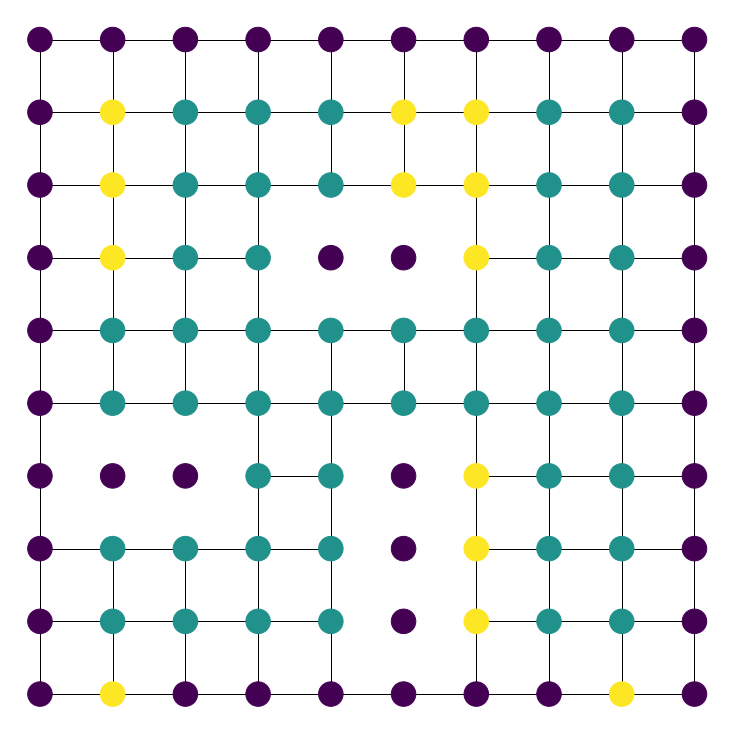

In [11]:
g = model.graph

plt.figure(figsize=(config["width"], config["height"]))
pos = {(x,y):(x,-y) for x,y in g.nodes()}

val_map = {}
for x, y in pos:
    if x == 0 or x == 9 or y == 0 or y == 9:
        val_map[(x,y)] = 0.0
        
    for coords in model.objectives.values():
        if (x,y) in coords:
            val_map[(x,y)] = 0.5
            
    if (x,y) in [obj.pos for obj in model.obstacles]:
        val_map[(x,y)] = 0.0
        
values = [val_map.get(node, 0.25) for node in g.nodes()]

nx.draw(g, pos=pos, 
        node_color=values, 
        node_size=600)

In [8]:
# print(g.edges)